# 5 Modeling<a id='5_Modeling'></a>

## 5.1 Contents<a id='5.1_Contents'></a>
* [5 Modeling](#5_Modeling)
  * [5.1 Contents](#5.1_Contents)
  * [5.2 Introduction](#5.2_Introduction)
  * [5.3 Imports](#5.3_Imports)
  * [5.4 Load Data](#5.4_Load_Data)
  * [5.6 Train/Test Split](#5.6_Train/Test_Split)
  * [5.7 Initial Models](#5.7_Initial_Models)
    * [5.7.1 Logistic Regression](#5.7.1_Logistic_Regression)
      * [5.7.1.1 Define Pipeline](#5.7.1.1_Define_Pipeline)
      * [5.7.1.2 Hyperparameter search using GridSearchCV](#5.7.1.2_Hyperparameter_search_using_GridSearchCV)
      * [5.7.1.3 Summary](#5.7.1.3_Summary)
    * [5.7.2 Random Forest Classifier](#5.7.2_Random_Forest_Classifier)
      * [5.7.2.1 Define Pipeline](#5.7.2.1_Define_Pipeline)
      * [5.7.2.2 Hyperparameter search using GridSearchCV](#5.7.2.2_Hyperparameter_search_using_GridSearchCV)
      * [5.7.2.3 Summary](#5.7.2.3_Summary)
    * [5.7.3 KNeighbors Classifier](#5.7.3_KNeighbors_Classifier)
      * [5.7.3.1 Define Pipeline](#5.7.3.1_Define_Pipeline)
      * [5.7.3.2 Hyperparameter search using GridSearchCV](#5.7.3.2_Hyperparameter_search_using_GridSearchCV)
      * [5.7.3.3 Summary](#5.7.3.3_Summary)
    * [5.7.4 Decision Tree Classifier](#5.7.4_Decision_Tree_Classifier)
      * [5.7.4.1 Define Pipeline](#5.7.4.1_Define_Pipeline)
      * [5.7.4.2 Hyperparameter search using GridSearchCV](#5.7.4.2_Hyperparameter_search_using_GridSearchCV)
      * [5.7.4.3 Summary](#5.7.4.3_Summary)
    * [5.7.5 Gradient Boosting](#5.7.5_Gradient_Boosting)
      * [5.7.5.1 Define Pipeline](#5.7.5.1_Define_Pipeline)
      * [5.7.5.2 Hyperparameter search using GridSearchCV](#5.7.5.2_Hyperparameter_search_using_GridSearchCV)
      * [5.7.5.3 Summary](#5.7.5.3_Summary)
  * [5.8 Compare and Vizualize Models](#5.8_Compare_and_Vizualize_Models)
    * [5.8.1 Accuracy](#5.8.1_Accuracy)
    * [5.8.2 RMSE](#5.8.2_RMSE)
    * [5.8.3 Mean Cross Validation Score](#5.8.3_Mean_Cross_Validation_Score)
    * [5.8.4 ROC AUC Score](#5.8.4_ROC_AUC_Score)
    * [5.8.5 ROC Curve](#5.8.5_ROC_Curve)
    * [5.8.6 Confusion Matrix](#5.8.6_Confusion_Matrix)
  * [5.9 Final Model](#5.9_Final_Model)
    * [5.9.1 Feature importance](#5.9.1_Feature_importance)
    * [5.9.2 Modeling scenarios](#5.9.2_Modeling_scenarios)
  * [5.10 Summary](#5.10_Summary)

## 5.2 Introduction<a id='5.2_Introduction'></a>

In this notebook, perform modelling using different approaches and evaluate the performance using different metrics such as  accuracy, classification report, confusion matrix, roc auc score etc. Then select the best model.

## 5.3 Imports<a id='5.3_Imports'></a>

In [6]:
import pandas as pd
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import __version__ as sklearn_version
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve, cross_val_score
from sklearn.preprocessing import StandardScaler #, MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_regression
import datetime
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, f1_score, accuracy_score

## 5.4 Load Data<a id='5.4_Load_Data'></a>

In [8]:
data_encoded = pd.read_csv('../data/processed/heart_attack_prediction_dataset_encoded.csv')

In [9]:
data_encoded.head()

,Cholesterol,Diabetes,Exercise Hours Per Week,Triglycerides,Systolic,Age,Previous Heart Problems,Medication Use,Heart Attack Risk,Cholesterol Level_At Risk,Cholesterol Level_Dangerous,Cholesterol Level_Hearty Health,Blood Pressure_Elevated,Blood Pressure_Healthy,Blood Pressure_Hypertension Crisis,Blood Pressure_Stage 1 Hypertension,Blood Pressure_Stage 2 Hypertension
0,208,0,4.168,286,158,67,0,0,0,1,0,0,0,0,0,0,1
1,389,1,1.813,235,165,21,1,0,0,0,1,0,0,0,0,0,1
2,324,1,2.078,587,174,21,1,1,0,0,1,0,0,0,0,0,1
3,383,1,9.828,378,163,84,1,0,0,0,1,0,0,0,0,0,1
4,318,1,5.804,231,91,66,1,0,0,0,1,0,0,1,0,0,0


In [10]:
data_encoded.shape

(8763, 17)

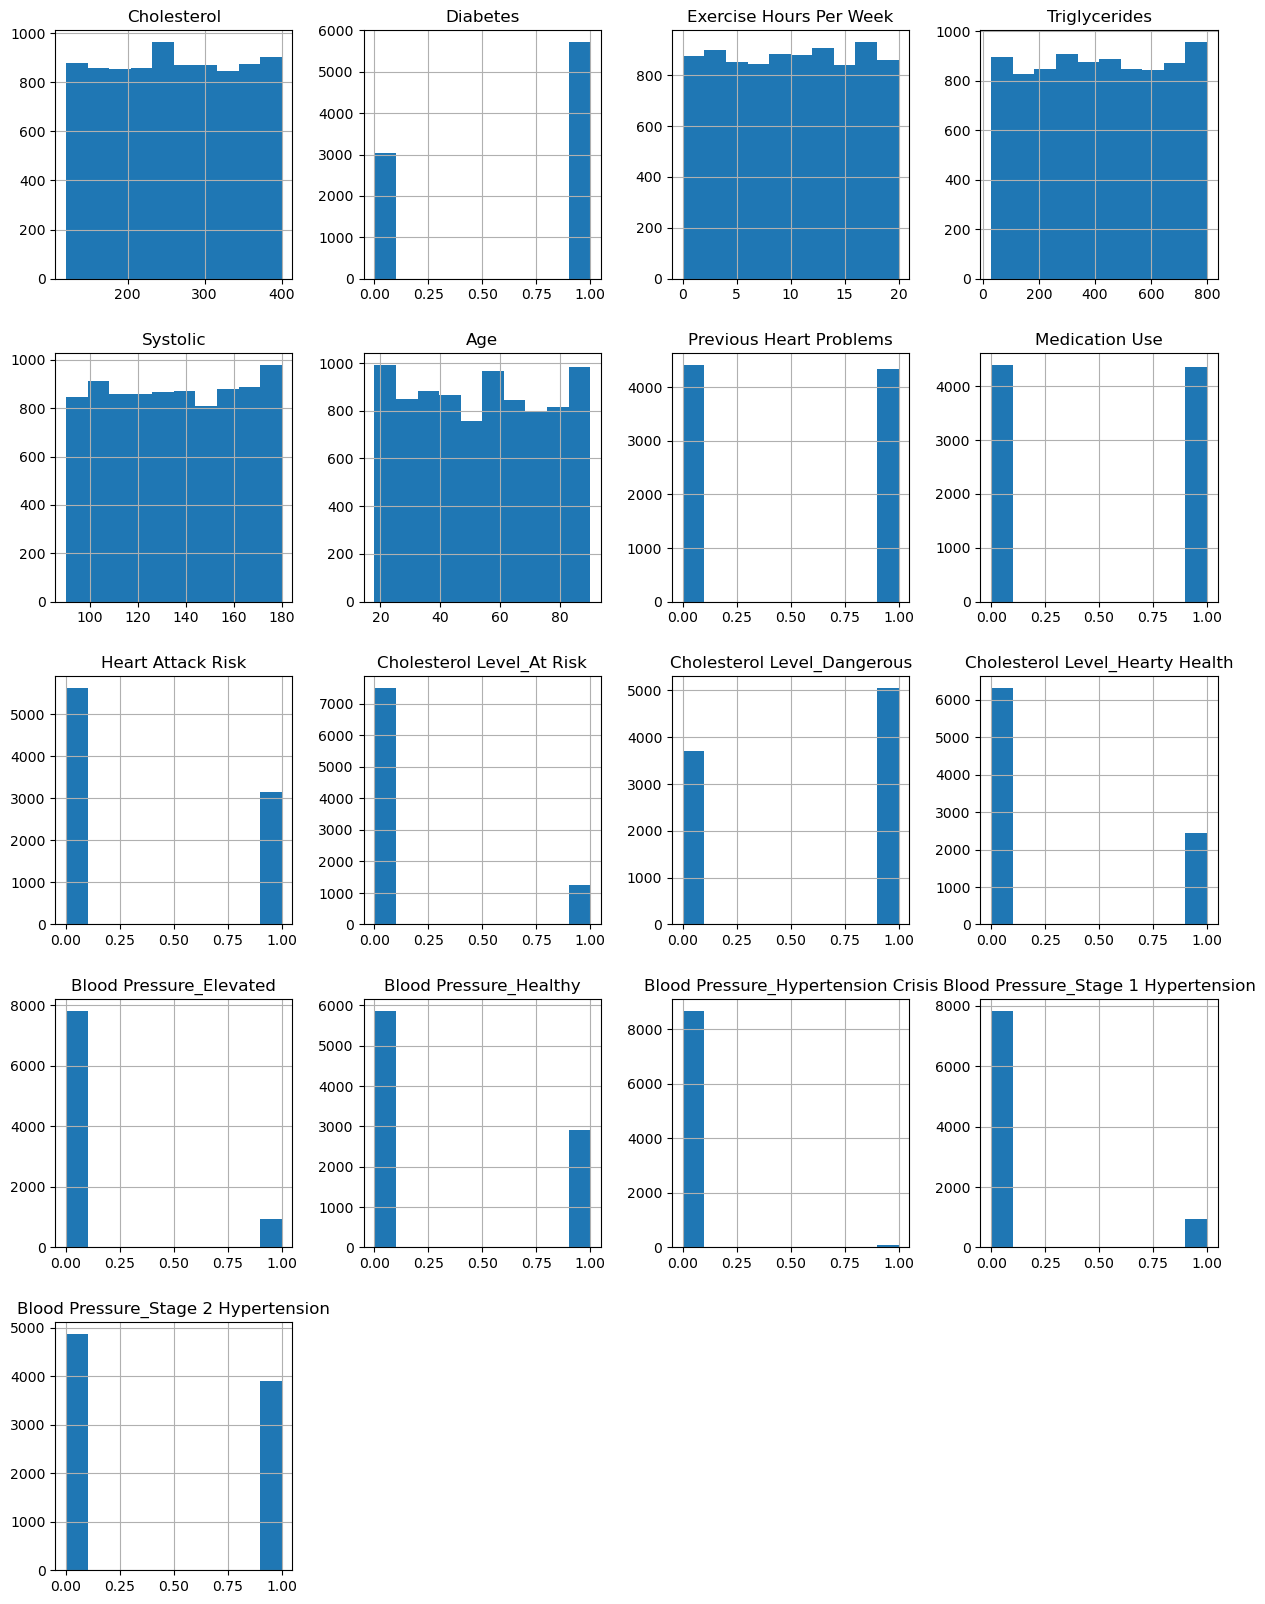

In [11]:
data_encoded.hist(figsize=(15, 20))
plt.show()

## 5.6 Train/Test Split<a id='5.6_Train/Test_Split'></a>

In [13]:
X = data_encoded.drop("Heart Attack Risk", axis=1)
y = data_encoded["Heart Attack Risk"]

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)

## 5.7 Initial Models<a id='5.7_Initial_Models'></a>

In [16]:
# initialize dict to store results of each model
mean_cross_val_score_results = {}
accuracy_results = {}
rmse_results = {}
roc_score_results = {}

### 5.7.1 Logistic Regression<a id='5.7.1_Logistic_Regression'></a>

#### 5.7.1.1 Define Pipeline<a id='5.7.1.1_Define_Pipeline'></a>

In [19]:
from sklearn.linear_model import LogisticRegression

# Build the steps
steps = [("scaler", StandardScaler()),
         ("logreg", LogisticRegression())]
logreg_pipeline = Pipeline(steps)

#### 5.7.1.2 Hyperparameter search using GridSearchCV<a id='5.7.1.2_Hyperparameter_search_using_GridSearchCV'></a>

In [21]:
# Create the parameter space
parameters = {"logreg__C": np.linspace(0.001, 1.0, 20)}
# Instantiate the grid search object
logreg_cv = GridSearchCV(logreg_pipeline, param_grid=parameters, cv=5, scoring='accuracy', n_jobs=-1)
# Fit to the training data
logreg_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('logreg', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'logreg__C': array([0.001     , 0.05357895, 0.10615789, 0.15873684, 0.21131579,
       0.26389474, 0.31647368, 0.36905263, 0.42163158, 0.47421053,
       0.52678947, 0.57936842, 0.63194737, 0.68452632, 0.73710526,
       0.78968421, 0.84226316, 0.89484211, 0.94742105, 1.        ])},
             scoring='accuracy')

In [22]:
mean_cross_val_score_results["Logistic Regression"] = logreg_cv.best_score_
print("Best Score : ", logreg_cv.best_score_)
print("Best Params : ", logreg_cv.best_params_)

Best Score :  0.6432673992673992
Best Params :  {'logreg__C': 0.2113157894736842}


In [23]:
y_pred = logreg_cv.predict(X_test)
logreg_cm = metrics.confusion_matrix(y_test, y_pred)

accuracy_score = metrics.accuracy_score(y_test, y_pred)
accuracy_results["Logistic Regression"] = accuracy_score
print("Accuracy:", accuracy_score)
print("\n")
print("Confusion Matrix:\n", logreg_cm)
print("\n")
print("Classification Report:\n", metrics.classification_report(y_test, y_pred, zero_division=1))

Accuracy: 0.6414206247325631


Confusion Matrix:
 [[4484   14]
 [2500   13]]


Classification Report:
               precision    recall  f1-score   support

           0       0.64      1.00      0.78      4498
           1       0.48      0.01      0.01      2513

    accuracy                           0.64      7011
   macro avg       0.56      0.50      0.40      7011
weighted avg       0.58      0.64      0.50      7011



In [24]:
rmse_results["Logistic Regression"] = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print("RMSE:", rmse_results["Logistic Regression"])

RMSE: 0.5988149758209432


In [25]:
logreg_best = logreg_cv.best_estimator_

# Predict probabilities
y_pred_probs_logreg = logreg_best.predict_proba(X_test)[:, 1]
# Calculate roc_auc_score
roc_score = roc_auc_score(y_test, y_pred_probs_logreg)
roc_score_results["Logistic Regression"] = roc_score
print("ROC AUC Score:", roc_score)

ROC AUC Score: 0.4977639617696294


#### 5.7.1.3 Summary<a id='5.7.1.3_Summary'></a>

This model gives best performance for the params C: 0.2113157894736842
* Accuracy is 0.6414206247325631
* Out of 7011 Train Data Set 
    * Model correctly predicted 4484 No Heart Attack Risk and 13 Heart Attack Risk
    * Model incorrectly predicted 2500 Heart Attach Risk as No Heart Attack Risk and 14 No Heart Attack Risk as Heart Attack Risk
* ROC AUC Score value is 0.4977639617696294 suggests that the classifier is not able to distinguish between positive and negative classes. 

### 5.7.2 Random Forest Classifier<a id='5.7.2_Random_Forest_Classifier'></a>

#### 5.7.2.1 Define Pipeline<a id='5.7.2.1_Define_Pipeline'></a>

In [30]:
from sklearn.ensemble import RandomForestClassifier

# Build the steps
steps = [("scaler", StandardScaler()),
         ("clf", RandomForestClassifier(random_state = 42))]
rf_pipeline = Pipeline(steps)

#### 5.7.2.2 Hyperparameter search using GridSearchCV<a id='5.7.2.2_Hyperparameter_search_using_GridSearchCV'></a>

In [32]:
# Create the parameter space
parameters = { 
    'clf__n_estimators': [100, 200, 300],
    'clf__max_depth': [3, 5, 10],
    'clf__min_samples_split': [2, 5, 10],
    'clf__criterion' : ['gini', 'entropy']
}

# Instantiate the grid search object
rf_cv = GridSearchCV(rf_pipeline, param_grid=parameters, cv=5, scoring='accuracy', n_jobs=-1)
# Fit to the training data
rf_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('clf',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'clf__criterion': ['gini', 'entropy'],
                         'clf__max_depth': [3, 5, 10],
                         'clf__min_samples_split': [2, 5, 10],
                         'clf__n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [33]:
mean_cross_val_score_results["Random Forest"] = rf_cv.best_score_
print("Best Score : ", rf_cv.best_score_)
print("Best Params : ", rf_cv.best_params_)

Best Score :  0.6432673992673993
Best Params :  {'clf__criterion': 'gini', 'clf__max_depth': 3, 'clf__min_samples_split': 2, 'clf__n_estimators': 200}


In [34]:
y_pred = rf_cv.predict(X_test)
rf_cm = metrics.confusion_matrix(y_test, y_pred)

accuracy_score = metrics.accuracy_score(y_test, y_pred)
accuracy_results["Random Forest"] = accuracy_score
print("Accuracy:", accuracy_score)
print("\n")
print("Confusion Matrix:\n", rf_cm)
print("\n")
print("Classification Report:\n", metrics.classification_report(y_test, y_pred, zero_division=1))

Accuracy: 0.6414206247325631


Confusion Matrix:
 [[4497    1]
 [2513    0]]


Classification Report:
               precision    recall  f1-score   support

           0       0.64      1.00      0.78      4498
           1       0.00      0.00      0.00      2513

    accuracy                           0.64      7011
   macro avg       0.32      0.50      0.39      7011
weighted avg       0.41      0.64      0.50      7011



In [35]:
rmse_results["Random Forest"] = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print("RMSE:", rmse_results["Random Forest"])

RMSE: 0.5988149758209432


In [36]:
rf_best = rf_cv.best_estimator_

# Predict probabilities
y_pred_probs_rf = rf_best.predict_proba(X_test)[:, 1]
# Calculate roc_auc_score
roc_score = roc_auc_score(y_test, y_pred_probs_rf)
roc_score_results["Random Forest"] = roc_score
print("ROC AUC Score:", roc_score)

ROC AUC Score: 0.50799285246288


#### 5.7.2.3 Summary<a id='5.7.2.3_Summary'></a>

This model gives best performance for the params criterion: 'gini', max_depth: 3, min_samples_split: 2, n_estimators: 200
* Accuracy is 0.6414206247325631
* Out of 7011 Train Data Set 
    * Model correctly predicted 4497 No Heart Attack Risk and 0 Heart Attack Risk
    * Model incorrectly predicted 2513 Heart Attach Risk as No Heart Attack Risk and 1 No Heart Attack Risk as Heart Attack Risk
* ROC AUC Score value is 0.50799285246288 suggests that the classifier is not able to distinguish between positive and negative classes. 

### 5.7.3 KNeighbors Classifier<a id='5.7.3_KNeighbors_Classifier'></a>

#### 5.7.3.1 Define Pipeline<a id='5.7.3.1_Define_Pipeline'></a>

In [41]:
from sklearn.neighbors import KNeighborsClassifier

# Build the steps
steps = [("scaler", StandardScaler()),
         ("knn", KNeighborsClassifier())]
knn_pipeline = Pipeline(steps)

#### 5.7.3.2 Hyperparameter search using GridSearchCV<a id='5.7.3.2_Hyperparameter_search_using_GridSearchCV'></a>

In [43]:
# Create the parameter space
parameters = { 
    'knn__n_neighbors': np.arange(1,50)
}

# Instantiate the grid search object
knn_cv = GridSearchCV(knn_pipeline, param_grid=parameters, cv=5, scoring='accuracy', n_jobs=-1)
# Fit to the training data
knn_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'knn__n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
             scoring='accuracy')

In [44]:
mean_cross_val_score_results["KNN"] = knn_cv.best_score_
print("Best Score : ", knn_cv.best_score_)
print("Best Params : ", knn_cv.best_params_)

Best Score :  0.644981684981685
Best Params :  {'knn__n_neighbors': 47}


In [45]:
y_pred = knn_cv.predict(X_test)
knn_cm = metrics.confusion_matrix(y_test, y_pred)

accuracy_score = metrics.accuracy_score(y_test, y_pred)
accuracy_results["KNN"] = accuracy_score
print("Accuracy:", accuracy_score)
print("\n")
print("Confusion Matrix:\n", knn_cm)
print("\n")
print("Classification Report:\n", metrics.classification_report(y_test, y_pred, zero_division=1))

Accuracy: 0.6378547996006276


Confusion Matrix:
 [[4452   46]
 [2493   20]]


Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.99      0.78      4498
           1       0.30      0.01      0.02      2513

    accuracy                           0.64      7011
   macro avg       0.47      0.50      0.40      7011
weighted avg       0.52      0.64      0.50      7011



In [46]:
rmse_results["KNN"] = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print("RMSE:", rmse_results["KNN"])

RMSE: 0.6017850117769405


In [47]:
knn_best = knn_cv.best_estimator_

# Predict probabilities
y_pred_probs_knn = rf_best.predict_proba(X_test)[:, 1]
# Calculate roc_auc_score
roc_score = roc_auc_score(y_test, y_pred_probs_knn)
roc_score_results["KNN"] = roc_score
print("ROC AUC Score:", roc_score)

ROC AUC Score: 0.50799285246288


#### 5.7.3.3 Summary<a id='5.7.3.3_Summary'></a>

This model gives best performance for the params n_neighbors: 47
* Accuracy is 0.6378547996006276
* Out of 7011 Train Data Set 
    * Model correctly predicted 4452 No Heart Attack Risk and 20 Heart Attack Risk
    * Model incorrectly predicted 2493 Heart Attach Risk as No Heart Attack Risk and 46 No Heart Attack Risk as Heart Attack Risk
* ROC AUC Score value is 0.5070188467983643 suggests that the classifier is not able to distinguish between positive and negative classes. 

### 5.7.4 Decision Tree Classifier<a id='5.7.4_Decision_Tree_Classifier'></a>

In [51]:
#### 5.7.4.1 Define Pipeline<a id='5.7.4.1_Define_Pipeline'></a>

In [52]:
from sklearn.tree import DecisionTreeClassifier

# Build the steps
steps = [("scaler", StandardScaler()),
         ("clf", DecisionTreeClassifier())]
dtree_pipeline = Pipeline(steps)

In [53]:
#### 5.7.4.2 Hyperparameter search using GridSearchCV<a id='5.7.4.2_Hyperparameter_search_using_GridSearchCV'></a>

In [54]:
# Create the parameter space
parameters = { 
    'clf__max_depth': [3, 5, 10],
    'clf__min_samples_split': [2, 5, 10],
    'clf__criterion' : ['gini', 'entropy']
}

# Instantiate the grid search object
dtree_cv = GridSearchCV(dtree_pipeline, param_grid=parameters, cv=5, scoring='accuracy', n_jobs=-1)
# Fit to the training data
dtree_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('clf', DecisionTreeClassifier())]),
             n_jobs=-1,
             param_grid={'clf__criterion': ['gini', 'entropy'],
                         'clf__max_depth': [3, 5, 10],
                         'clf__min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [55]:
mean_cross_val_score_results["Decision Tree"] = dtree_cv.best_score_
print("Best Score : ", dtree_cv.best_score_)
print("Best Params : ", dtree_cv.best_params_)

Best Score :  0.6404086284086283
Best Params :  {'clf__criterion': 'entropy', 'clf__max_depth': 3, 'clf__min_samples_split': 2}


In [56]:
y_pred = dtree_cv.predict(X_test)
dtree_cm = metrics.confusion_matrix(y_test, y_pred)

accuracy_score = metrics.accuracy_score(y_test, y_pred)
accuracy_results["Decision Tree"] = accuracy_score
print("Accuracy:", accuracy_score)
print("\n")
print("Confusion Matrix:\n", dtree_cm)
print("\n")
print("Classification Report:\n", metrics.classification_report(y_test, y_pred, zero_division=1))

Accuracy: 0.6193125089145628


Confusion Matrix:
 [[4135  363]
 [2306  207]]


Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.92      0.76      4498
           1       0.36      0.08      0.13      2513

    accuracy                           0.62      7011
   macro avg       0.50      0.50      0.45      7011
weighted avg       0.54      0.62      0.53      7011



In [57]:
rmse_results["Decision Tree"] = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print("RMSE:", rmse_results["Decision Tree"])

RMSE: 0.6169987772155121


In [58]:
dtree_best = dtree_cv.best_estimator_

# Predict probabilities
y_pred_probs_dtree = dtree_best.predict_proba(X_test)[:, 1]
# Calculate roc_auc_score
roc_score = roc_auc_score(y_test, y_pred_probs_dtree)
roc_score_results["Decision Tree"] = roc_score
print("ROC AUC Score:", roc_score)

ROC AUC Score: 0.5026913849671348


#### 5.7.4.3 Summary<a id='5.7.4.3_Summary'></a>

This model gives best performance for the params criterion: 'entropy', max_depth: 3, min_samples_split: 2
* Accuracy is 0.6193125089145628
* Out of 7011 Train Data Set 
    * Model correctly predicted 4135 No Heart Attack Risk and 207 Heart Attack Risk
    * Model incorrectly predicted 2306 Heart Attach Risk as No Heart Attack Risk and 363 No Heart Attack Risk as Heart Attack Risk
* ROC AUC Score value is 0.5026913849671348 suggests that the classifier is not able to distinguish between positive and negative classes. 

### 5.7.5 Gradient Boosting<a id='5.7.5_Gradient_Boosting'></a>

#### 5.7.5.1 Define Pipeline<a id='5.7.5.1_Define_Pipeline'></a>

In [63]:
from sklearn.ensemble import GradientBoostingClassifier

# Build the steps
steps = [("scaler", StandardScaler()),
         ("gb", GradientBoostingClassifier())]
gb_pipeline = Pipeline(steps)

In [64]:
#### 5.7.5.2 Hyperparameter search using GridSearchCV<a id='5.7.5.2_Hyperparameter_search_using_GridSearchCV'></a>

In [65]:
# Create the parameter space
parameters = { 
    'gb__n_estimators': [100, 200, 300],
    'gb__max_depth': [3, 5, 10],
    'gb__learning_rate': [0.01, 0.1, 0.2] 
}

# Instantiate the grid search object
gb_cv = GridSearchCV(gb_pipeline, param_grid=parameters, cv=5, scoring='accuracy', n_jobs=-1)
# Fit to the training data
gb_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('gb', GradientBoostingClassifier())]),
             n_jobs=-1,
             param_grid={'gb__learning_rate': [0.01, 0.1, 0.2],
                         'gb__max_depth': [3, 5, 10],
                         'gb__n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [66]:
mean_cross_val_score_results["Gradient Boosting"] = gb_cv.best_score_
print("Best Score : ", gb_cv.best_score_)
print("Best Params : ", gb_cv.best_params_)

Best Score :  0.6455449735449734
Best Params :  {'gb__learning_rate': 0.01, 'gb__max_depth': 3, 'gb__n_estimators': 200}


In [67]:
y_pred = gb_cv.predict(X_test)
gb_cm = metrics.confusion_matrix(y_test, y_pred)

accuracy_score = metrics.accuracy_score(y_test, y_pred)
accuracy_results["Gradient Boosting"] = accuracy_score
print("Accuracy:", accuracy_score)
print("\n")
print("Confusion Matrix:\n", gb_cm)
print("\n")
print("Classification Report:\n", metrics.classification_report(y_test, y_pred, zero_division=1))

Accuracy: 0.6302952503209243


Confusion Matrix:
 [[4322  176]
 [2416   97]]


Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.96      0.77      4498
           1       0.36      0.04      0.07      2513

    accuracy                           0.63      7011
   macro avg       0.50      0.50      0.42      7011
weighted avg       0.54      0.63      0.52      7011



In [68]:
rmse_results["Gradient Boosting"] = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print("RMSE:", rmse_results["Gradient Boosting"])

RMSE: 0.6080335103257679


In [69]:
gb_best = gb_cv.best_estimator_

# Predict probabilities
y_pred_probs_gb = gb_best.predict_proba(X_test)[:, 1]
# Calculate roc_auc_score
roc_score = roc_auc_score(y_test, y_pred_probs_gb)
roc_score_results["Gradient Boosting"] = roc_score
print("ROC AUC Score:", roc_score)

ROC AUC Score: 0.5132737952951455


#### 5.7.5.3 Summary<a id='5.7.5.3_Summary'></a>

This model gives best performance for the params criterion: 'entropy', max_depth: 3, min_samples_split: 2
* Accuracy is 0.6302952503209243
* Out of 7011 Train Data Set 
    * Model correctly predicted 4322 No Heart Attack Risk and 97 Heart Attack Risk
    * Model incorrectly predicted 2416 Heart Attach Risk as No Heart Attack Risk and 176 No Heart Attack Risk as Heart Attack Risk
* ROC AUC Score value is 0.5133579729559249 suggests that the classifier is not able to distinguish between positive and negative classes. 

## 5.8 Compare and Vizualize Models<a id='5.8_Compare_and_Vizualize_Models'></a>

### 5.8.1 Accuracy<a id='5.8.1_Accuracy'></a>

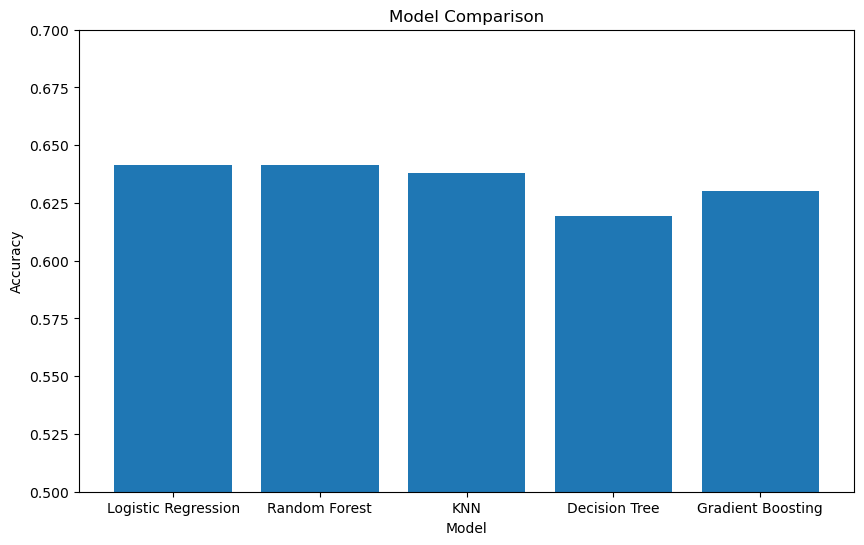

In [74]:
plt.figure(figsize=(10, 6))
plt.bar(accuracy_results.keys(), accuracy_results.values())
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Model Comparison")
plt.ylim(0.5, 0.7)
plt.show()

In [75]:
accuracy_results

{'Logistic Regression': 0.6414206247325631,
 'Random Forest': 0.6414206247325631,
 'KNN': 0.6378547996006276,
 'Decision Tree': 0.6193125089145628,
 'Gradient Boosting': 0.6302952503209243}

**Logistic Regression and Random Forest has highest accuracy of 64% followed by Gradient Boosting and KNN with 63% accuracy.**

### 5.8.2 RMSE<a id='5.8.2_RMSE'></a>

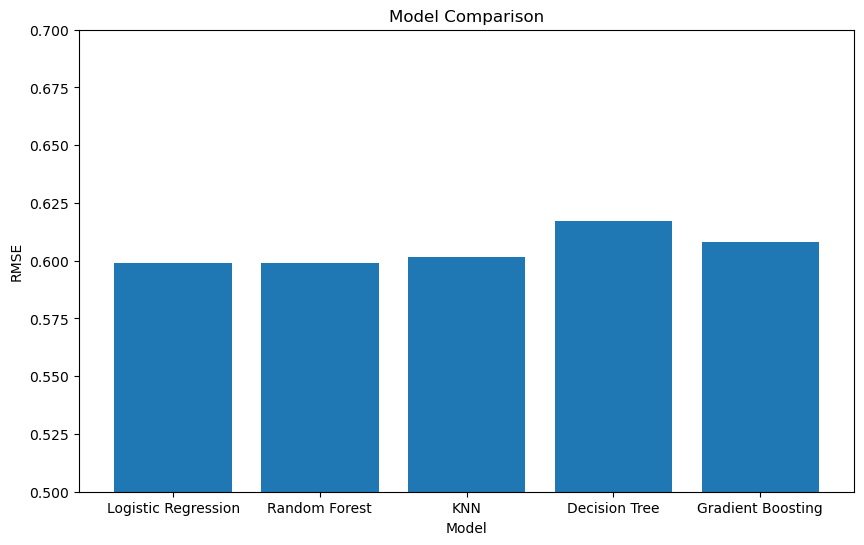

In [78]:
# Visualize results
plt.figure(figsize=(10, 6))
plt.bar(rmse_results.keys(), rmse_results.values())
plt.xlabel("Model")
plt.ylabel("RMSE")
plt.title("Model Comparison")
plt.ylim(0.5, 0.7)
plt.show()

In [79]:
rmse_results

{'Logistic Regression': 0.5988149758209432,
 'Random Forest': 0.5988149758209432,
 'KNN': 0.6017850117769405,
 'Decision Tree': 0.6169987772155121,
 'Gradient Boosting': 0.6080335103257679}

**A lower RMSE value indicates that the model's predictions are, on average, closer to the actual values, suggesting a better-performing model. All models has closer value of 0.60**

### 5.8.3 Mean Cross Validation Score<a id='5.8.3_Mean_Cross_Validation_Score'></a>

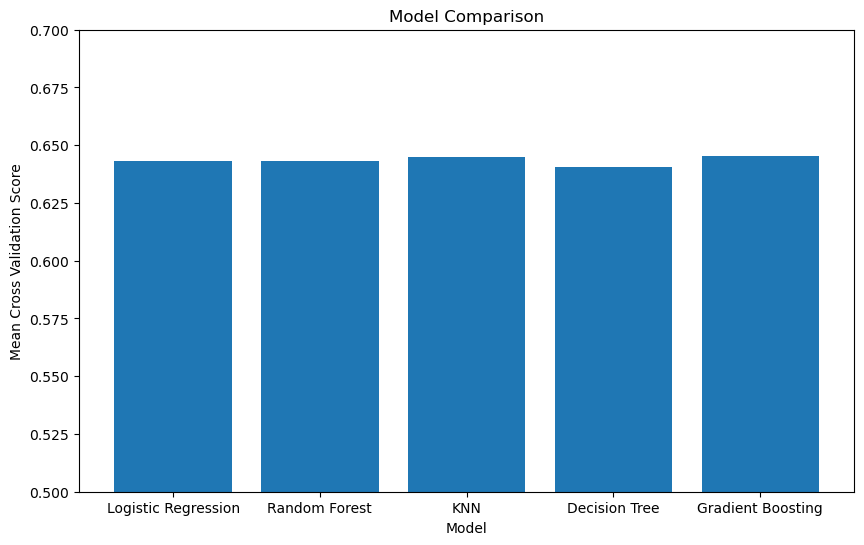

In [82]:
# Visualize results
plt.figure(figsize=(10, 6))
plt.bar(mean_cross_val_score_results.keys(), mean_cross_val_score_results.values())
plt.xlabel("Model")
plt.ylabel("Mean Cross Validation Score")
plt.title("Model Comparison")
plt.ylim(0.5, 0.7)
plt.show()

In [83]:
mean_cross_val_score_results

{'Logistic Regression': 0.6432673992673992,
 'Random Forest': 0.6432673992673993,
 'KNN': 0.644981684981685,
 'Decision Tree': 0.6404086284086283,
 'Gradient Boosting': 0.6455449735449734}

**The cross-validation scores provide an estimate of the model's performance on unseen data. A higher average score across the folds indicates better generalization. All models has a value of 0.64**

### 5.8.4 ROC AUC Score<a id='5.8.4_ROC_AUC_Score'></a>

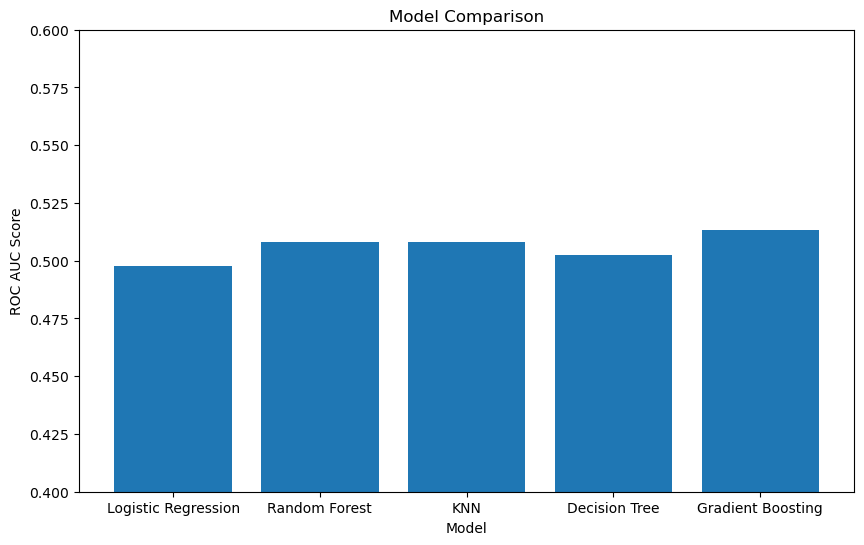

In [86]:
# Visualize results
plt.figure(figsize=(10, 6))
plt.bar(roc_score_results.keys(), roc_score_results.values())
plt.xlabel("Model")
plt.ylabel("ROC AUC Score")
plt.title("Model Comparison")
plt.ylim(0.4, 0.6)
plt.show()

In [87]:
roc_score_results

{'Logistic Regression': 0.4977639617696294,
 'Random Forest': 0.50799285246288,
 'KNN': 0.50799285246288,
 'Decision Tree': 0.5026913849671348,
 'Gradient Boosting': 0.5132737952951455}

**The AUC-ROC score (Area Under the Receiver Operating Characteristic Curve) quantifies a model's ability to distinguish between positive and negative classes, with a score of 1 representing perfect discrimination and 0.5 representing random guessing. All models has a closer value of 0.5**

### 5.8.5 ROC Curve<a id='5.8.5_ROC_Curve'></a>

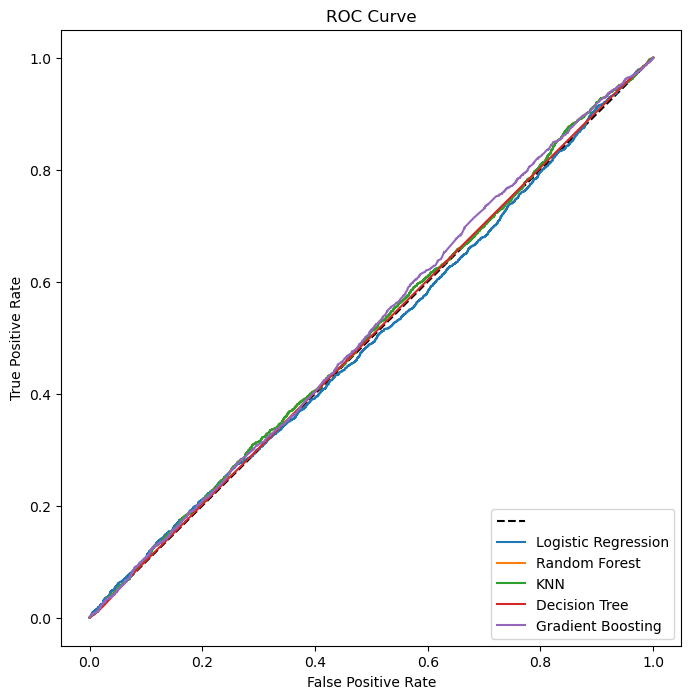

In [90]:
plt.figure(figsize=(8, 8))

labels = ('', 'Logistic Regression', 'Random Forest', 'KNN', 'Decision Tree', 'Gradient Boosting')

fpr_logreg, tpr_logreg, thresholds_logreg = roc_curve(y_test, y_pred_probs_logreg)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_probs_rf)
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_pred_probs_knn)
fpr_dtree, tpr_dtree, thresholds_dtree = roc_curve(y_test, y_pred_probs_dtree)
fpr_gb, tpr_gb, thresholds_gb = roc_curve(y_test, y_pred_probs_gb)

# Generate ROC curve values: fpr, tpr, thresholds
plt.plot([0, 1], [0, 1], 'k--')
# Plot tpr against fpr
plt.plot(fpr_logreg, tpr_logreg)
plt.plot(fpr_rf, tpr_rf)
plt.plot(fpr_knn, tpr_knn)
plt.plot(fpr_dtree, tpr_dtree)
plt.plot(fpr_gb, tpr_gb)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(labels, loc='lower right')
plt.show()

### 5.8.6 Confusion Matrix<a id='5.8.6_Confusion_Matrix'></a>

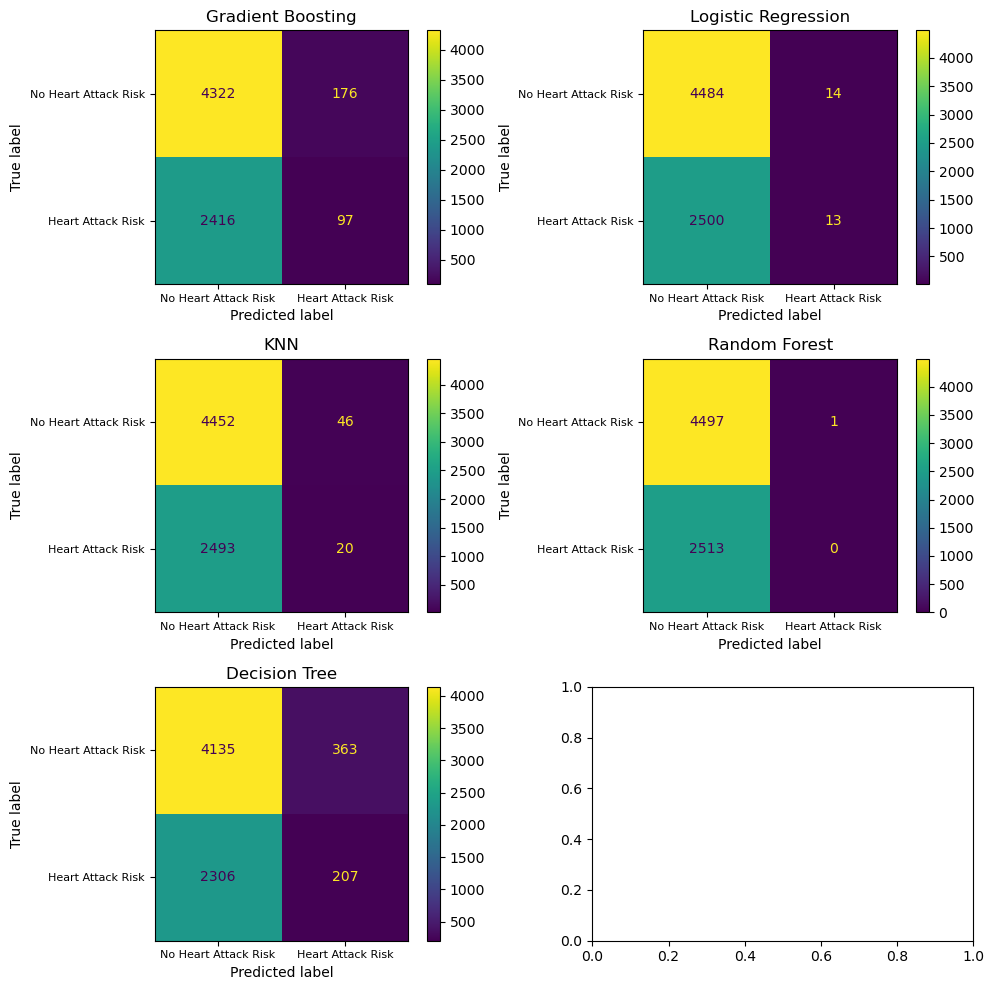

In [92]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10,10))
classifiers = {"Gradient Boosting": gb_cm,
                'Logistic Regression': logreg_cm,
                'KNN': knn_cm,
                'Random Forest': rf_cm,
                'Decision Tree': dtree_cm
              }

for cls, ax in zip(classifiers.items(), axes.flatten()):
    metrics.ConfusionMatrixDisplay(confusion_matrix=cls[1], display_labels=['No Heart Attack Risk', 'Heart Attack Risk']).plot(ax=ax)
    ax.title.set_text(cls[0])
    ax.set_xticks([0, 1])
    ax.set_yticks([0, 1])
    ax.set_xticklabels(labels = ['No Heart Attack Risk', 'Heart Attack Risk'], fontsize = 8)
    ax.set_yticklabels(labels = ['No Heart Attack Risk', 'Heart Attack Risk'], fontsize = 8)
plt.tight_layout()  
plt.show()

**Decision Tree and Gradient Boosting predicted most True Positive for heart attack risk**
* Decision Tree
    * 2.95 % predicted correctly Heart Attack Risk
    * 5.17 % predicted incorrectly Heart Attack Risk
* Gradient Boosting
    * 1.38 % predicted correctly Heart Attack Risk
    * 2.5 % predicted incorrectly Heart Attack Risk

## 5.9 Final Model<a id='5.9_Final_Model'></a>

**Considering all metrices, Gradient Boosting and Decision Tree performs best with Decision Tree predicted 2.95% correctly. Hence selecting Decision Tree for final modelling scenarios.**

In [96]:
best_model = dtree_best
best_model.version = 1.0
best_model.pandas_version = pd.__version__
best_model.numpy_version = np.__version__
best_model.sklearn_version = sklearn_version
best_model.X_columns = [col for col in X_train.columns]
best_model.build_datetime = datetime.datetime.now()

best_model.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('clf',
                 DecisionTreeClassifier(criterion='entropy', max_depth=3))])

### 5.9.1 Feature importance<a id='5.9.1_Feature_importance'></a>

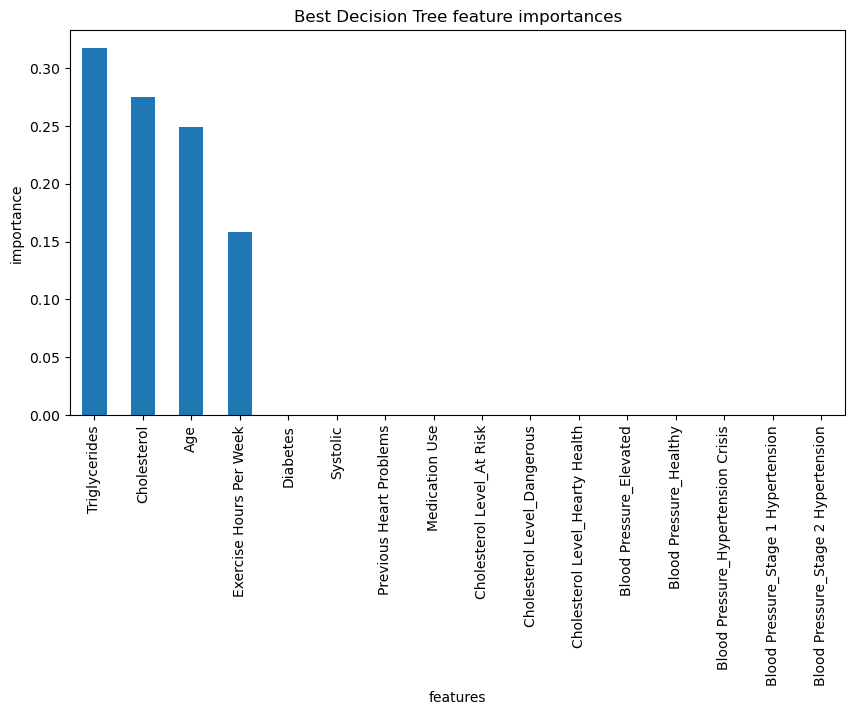

In [98]:
plt.subplots(figsize=(10, 5))
imps = best_model.named_steps.clf.feature_importances_
gb_feat_imps = pd.Series(imps, index=X_train.columns).sort_values(ascending=False)
gb_feat_imps.plot(kind='bar')
plt.xlabel('features')
plt.ylabel('importance')
plt.title('Best Decision Tree feature importances');

## 5.9.2 Modeling scenarios<a id='5.9.2_Modeling_scenarios'></a>

In [100]:
def predictHeartAttackRisk(triglycerides, cholestrol, age, exercise_hours_per_week):
    test_data = data_encoded.iloc[[0]].copy()
    test_data = test_data[X_train.columns]
    test_data['Triglycerides'] = triglycerides
    test_data['Cholesterol'] = cholestrol
    test_data['Age'] = age
    test_data['Exercise Hours Per Week'] = exercise_hours_per_week
    heart_attack_risk = best_model.predict(test_data).item()
    return heart_attack_risk

In [101]:
cholestrol_values = {
    "Normal" : 180,
    "At Risk" : 230,
    "Dangerous" : 380
}

triglycerides_values = {
    "Normal" : 140,
    "Borderline" : 190,
    "High" : 450,
    "Very High" : 550
}

age_values = {
    "Young" : 28,
    "Middle Age" : 48,
    "Senior" : 68
}

exercise_hours_per_week_values = {
    "Sedentary" : 0.5,
    "Lightly Active" : 2,
    "Moderately Active" : 4,
    "Very Active" : 6
}

scenario_col_values = []
cholestrol_col_values = []
triglycerides_col_values = []
heart_attack_risk_col_values = []
age_col_values = []
exercise_hours_per_week_col_values = []
index = 1

for c_k, c_v in cholestrol_values.items():
    for t_k, t_v in triglycerides_values.items():
        for a_k, a_v in age_values.items():
            for e_k, e_v in exercise_hours_per_week_values.items():
                #print(c_k, "-", c_v, ", ", t_k, "-", t_v, ", ", a_k, "-", a_v, ", ", e_k, "-", e_v)
                scenario_col_values.append(index)
                cholestrol_col_values.append('(' + c_k + ') ' + str(c_v))
                triglycerides_col_values.append('(' + t_k + ') ' + str(t_v))
                age_col_values.append('(' + a_k + ') ' + str(a_v))
                exercise_hours_per_week_col_values.append('(' + e_k + ') ' + str(e_v))
                heart_attack_risk = predictHeartAttackRisk(triglycerides = t_v, cholestrol = c_v, 
                                                           age = a_v, exercise_hours_per_week = e_v)
                
                if heart_attack_risk == 0:
                    heart_attack_risk_col_values.append("No")
                else:
                    heart_attack_risk_col_values.append("Yes")
                index = index + 1

data_map = {
    'Senario#': scenario_col_values,
    'Cholestrol': cholestrol_col_values,
    'Triglycerides': triglycerides_col_values,
    'Age': age_col_values,
    'Exercise Hours per Week': exercise_hours_per_week_col_values,
    'Heart Attack Risk Prediction': heart_attack_risk_col_values
}

pd.set_option('display.max_rows', 500)
df_scenarios = pd.DataFrame.from_dict(data_map)
df_scenarios = df_scenarios.set_index('Senario#')

#### All Heart Attack Risk Prediction Scenarios

In [103]:
df_scenarios

,Cholestrol,Triglycerides,Age,Exercise Hours per Week,Heart Attack Risk Prediction
Senario#,,,,,
1,(Normal) 180,(Normal) 140,(Young) 28,(Sedentary) 0.5,No
2,(Normal) 180,(Normal) 140,(Young) 28,(Lightly Active) 2,No
3,(Normal) 180,(Normal) 140,(Young) 28,(Moderately Active) 4,No
4,(Normal) 180,(Normal) 140,(Young) 28,(Very Active) 6,No
5,(Normal) 180,(Normal) 140,(Middle Age) 48,(Sedentary) 0.5,No
6,(Normal) 180,(Normal) 140,(Middle Age) 48,(Lightly Active) 2,No
7,(Normal) 180,(Normal) 140,(Middle Age) 48,(Moderately Active) 4,No
8,(Normal) 180,(Normal) 140,(Middle Age) 48,(Very Active) 6,No
9,(Normal) 180,(Normal) 140,(Senior) 68,(Sedentary) 0.5,No


#### Scenarios with Heart Attack Risk Predicted as Yes

In [105]:
df_scenarios.loc[df_scenarios['Heart Attack Risk Prediction'] == 'Yes']

,Cholestrol,Triglycerides,Age,Exercise Hours per Week,Heart Attack Risk Prediction
Senario#,,,,,
97,(Dangerous) 380,(Normal) 140,(Young) 28,(Sedentary) 0.5,Yes
101,(Dangerous) 380,(Normal) 140,(Middle Age) 48,(Sedentary) 0.5,Yes
105,(Dangerous) 380,(Normal) 140,(Senior) 68,(Sedentary) 0.5,Yes
109,(Dangerous) 380,(Borderline) 190,(Young) 28,(Sedentary) 0.5,Yes
113,(Dangerous) 380,(Borderline) 190,(Middle Age) 48,(Sedentary) 0.5,Yes
117,(Dangerous) 380,(Borderline) 190,(Senior) 68,(Sedentary) 0.5,Yes
121,(Dangerous) 380,(High) 450,(Young) 28,(Sedentary) 0.5,Yes
125,(Dangerous) 380,(High) 450,(Middle Age) 48,(Sedentary) 0.5,Yes
129,(Dangerous) 380,(High) 450,(Senior) 68,(Sedentary) 0.5,Yes


## 5.10 Summary<a id='5.10_Summary'></a>

When we train the model to predict Heart Attack Risk, best model gives an accuracy of 62%. 

Also we see it uses mainly below features to predit the target feature.

* Triglycerides
* Cholesterol
* Age
* Exercise Hours Per Week

Based on the scenarios tested with different values for these features, we can see the model predicted Heart attach risk if Exercise Hours Per Week is Sendentary along with higher values for Triglycerides  and/or Cholestrol.

Also model shows that even if patient has higher values for Triglycerides  and/or Cholestrol, if atleast lightly active, it does to predict Heart Attack Risk.

As per the metrics ROC AUC Score is 0.5026913849671348 which suggests that the classifier is not able to distinguish between positive and negative classes. For better model performance, it is recommended to have and ROC AUC Score of 0.8.

Considering all this, we need more features for the model to accurately predict the target feature.